In [1]:
#!pip install simple_fpa

In [2]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [3]:
%%capture out
! cd ..; pip install .

In [4]:
print((out.stdout.split('\n')[-2]))

In [5]:
from simple_fpa import Model, load_haile
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
    "lines.linewidth": 1,
    "figure.dpi":200
})

In [6]:
data = load_haile()

In [7]:
model = Model(data = data, auctionid_columns = ['auctionid'], bid_column = 'actual_bid')
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']
model.residualize(cont_covs, disc_covs, 'multiplicative')

In [8]:
# we can pick a smaller subset of auctions
model.data = model.data[model.data.auctionid.isin(list(set(model.data.auctionid.values))[:1000])].copy()
# we can pick certain numbers of bidders
model.data = model.data[model.data._bidders.isin([2,3,4,5])].copy()

In [9]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        11:12:53   Log-Likelihood:                -37633.
No. Observations:               60758   AIC:                         7.536e+04
Df Residuals:                   60711   BIC:                         7.578e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [10]:
# we can simulate artificial data, of course
# model.data._resid = np.sort(np.random.uniform(0,1,size = len(model.data)))

In [18]:
model.trim_residuals(10)
model.fit(smoothing_rate = 0.3, trim_percent = 5, boundary = 'reflect')
model.predict()

In [19]:
model.make_ci_asy(95, hyp = 'twosided')

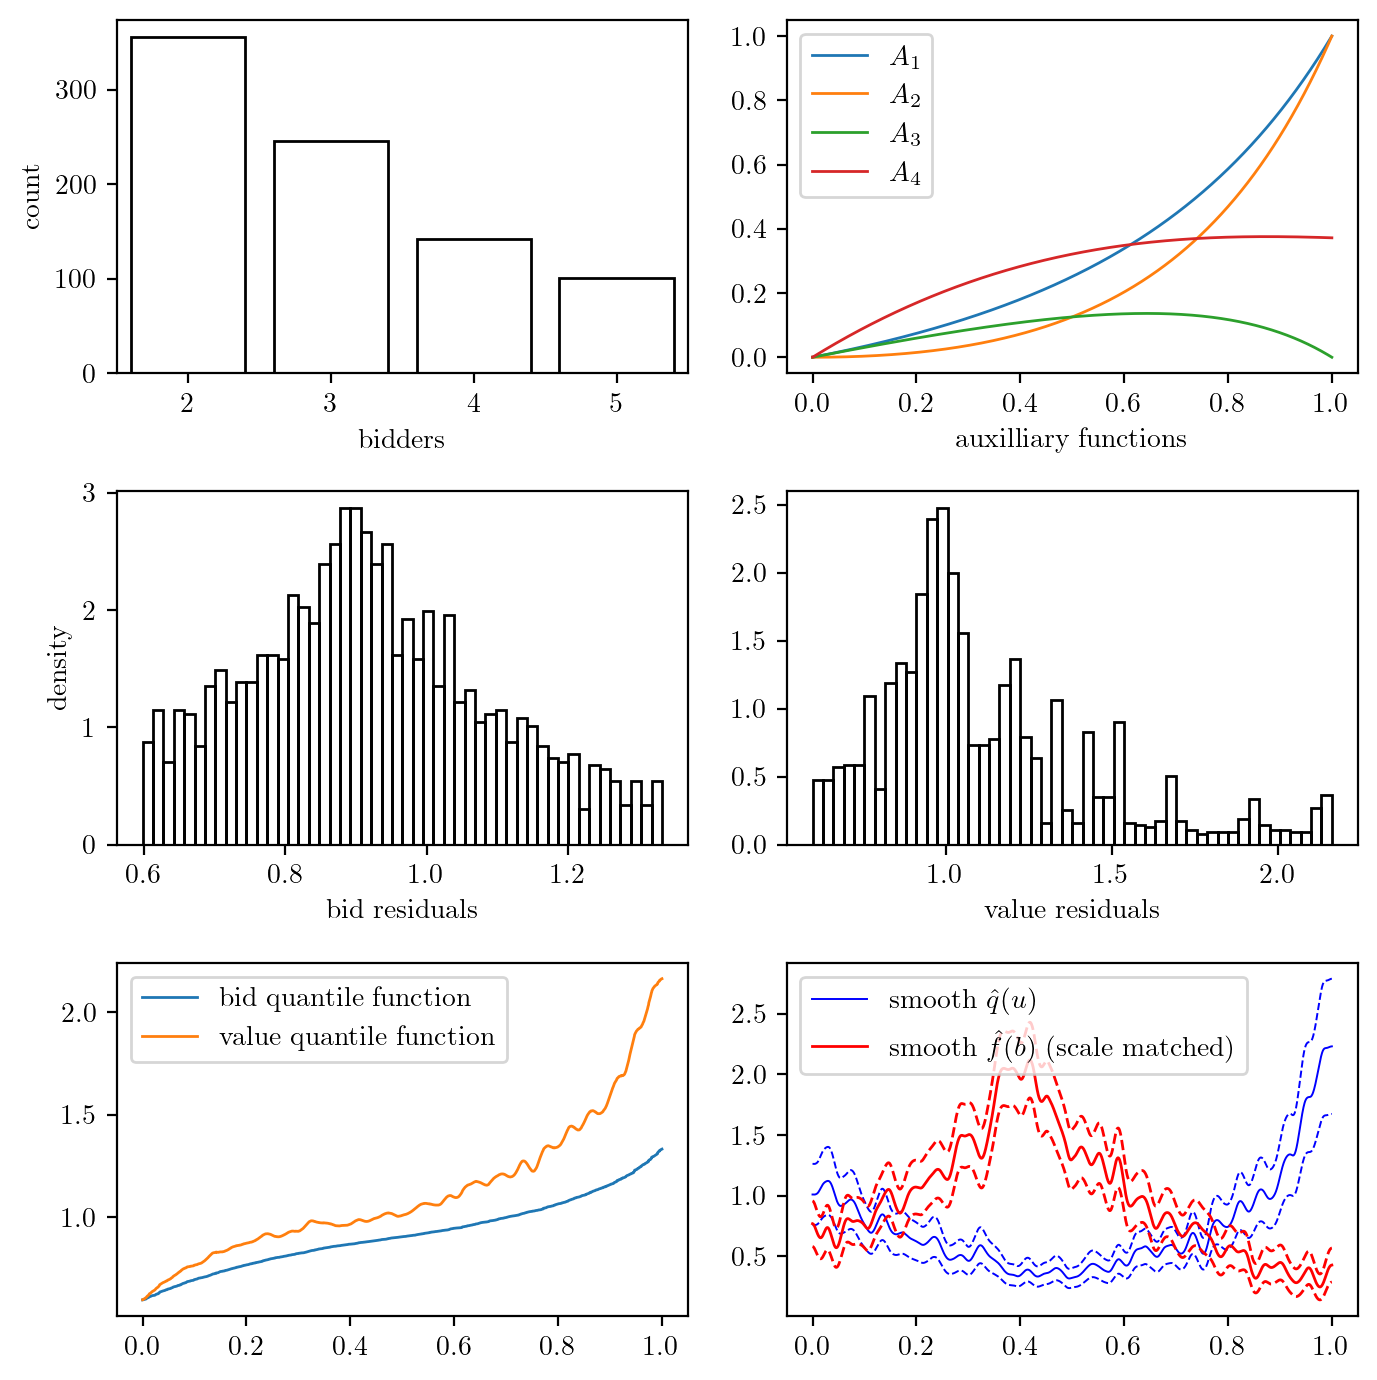

In [20]:
model.plot_stats()

In [21]:
model.make_cicb(95, draws = 1000, hyp = 'twosided')

In [22]:
model.find_optimal_u()

optimal exclusion: 0.32391


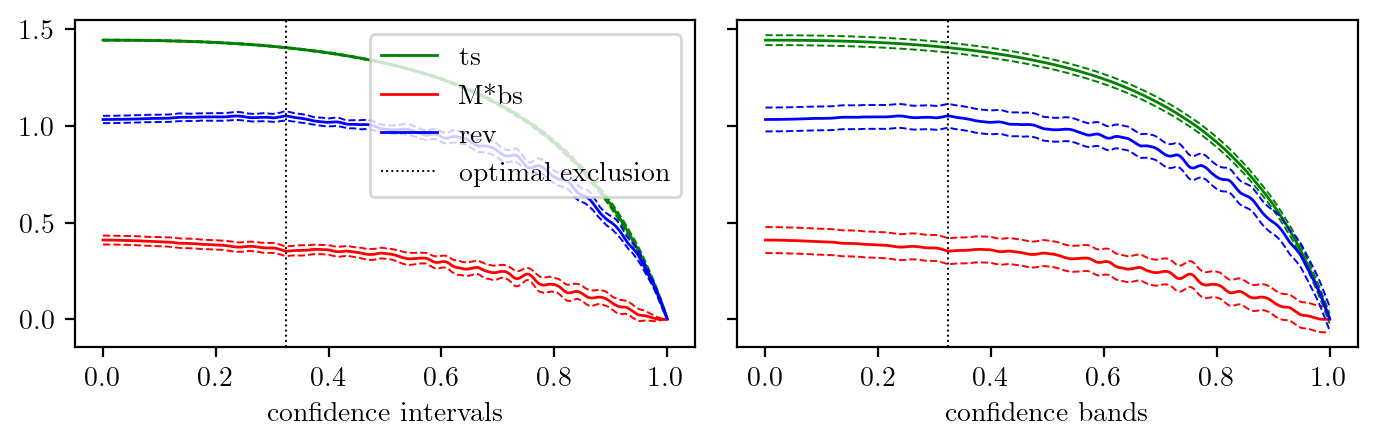

In [23]:
model.plot_counterfactuals()

In [24]:
model.data.sample(5)

,auctionid,hhi,forest,adv_value,year,state,volume_total_1,actual_bid,_bidders,_resid,...,_q_ci,_q_cb,_v_ci,_v_cb,_ts_ci,_ts_cb,_bs_ci,_bs_cb,_rev_ci,_rev_cb
405,405,1.000000,7,527240.0,82,28,40.0,944000.0,5,1.521176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,403,1.000000,7,394680.0,82,28,30.0,696000.0,3,1.495917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,824,0.528345,5,1339634.0,82,29,357.0,1843905.0,5,0.869077,...,0.082964,0.562052,0.024167,0.206412,0.002675,0.025568,0.002762,0.007457,0.020507,0.061666
0,0,0.469303,3,757400.0,82,30,620.0,3648800.0,2,2.577984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16934,465,0.802469,7,448212.0,82,28,48.0,523092.0,3,0.922466,...,0.118148,0.562052,0.039103,0.206412,0.003523,0.025568,0.003445,0.007457,0.027567,0.061666
